In [1]:
import pandas as pd

# Load the dataset
df = pd.read_csv('dataset.csv')

# Display the first few rows of the dataset
print(df.head())

# Display basic information about the dataset
print(df.info())

# Check for missing values
print(df.isnull().sum())


   Unnamed: 0                track_id                 artists  \
0           0  5SuOikwiRyPMVoIQDJUgSV             Gen Hoshino   
1           1  4qPNDBW1i3p13qLCt0Ki3A            Ben Woodward   
2           2  1iJBSr7s7jYXzM8EGcbK5b  Ingrid Michaelson;ZAYN   
3           3  6lfxq3CG4xtTiEg7opyCyx            Kina Grannis   
4           4  5vjLSffimiIP26QG5WcN2K        Chord Overstreet   

                                          album_name  \
0                                             Comedy   
1                                   Ghost (Acoustic)   
2                                     To Begin Again   
3  Crazy Rich Asians (Original Motion Picture Sou...   
4                                            Hold On   

                   track_name  popularity  duration_ms  explicit  \
0                      Comedy          73       230666     False   
1            Ghost - Acoustic          55       149610     False   
2              To Begin Again          57       210826     False   


In [3]:
!pip install vaderSentiment


  Obtaining dependency information for vaderSentiment from https://files.pythonhosted.org/packages/76/fc/310e16254683c1ed35eeb97386986d6c00bc29df17ce280aed64d55537e9/vaderSentiment-3.3.2-py2.py3-none-any.whl.metadata
   ---------------------------------------- 0.0/126.0 kB ? eta -:--:--
   ---------------------------------------- 126.0/126.0 kB 3.7 MB/s eta 0:00:00


In [6]:
import pandas as pd
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

# Convert all track names to strings to handle any non-string values
df['track_name'] = df['track_name'].astype(str)

# Initialize the VADER sentiment analyzer
analyzer = SentimentIntensityAnalyzer()

# Function to compute sentiment scores
def sentiment_analysis(text):
    scores = analyzer.polarity_scores(text)
    return scores['compound']

# Apply sentiment analysis to the track names
df['sentiment_score'] = df['track_name'].apply(sentiment_analysis)

# Classify the sentiment based on the compound score
df['sentiment'] = df['sentiment_score'].apply(lambda x: 'positive' if x >= 0.05 else ('negative' if x <= -0.05 else 'neutral'))

# Display the sentiment distribution
print(df['sentiment'].value_counts())


neutral     88442
positive    15317
negative    10241
Name: sentiment, dtype: int64


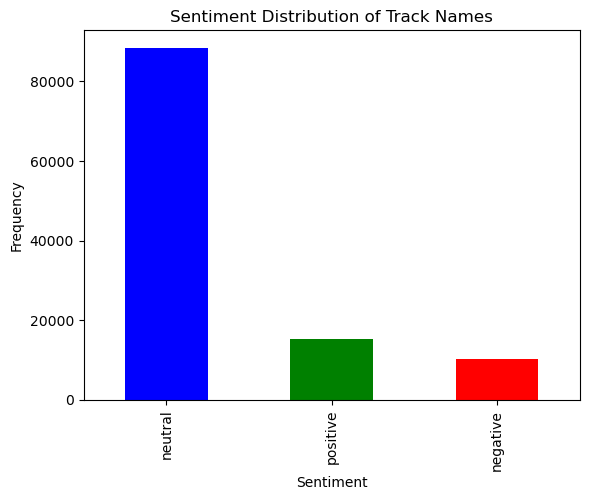

In [7]:
import matplotlib.pyplot as plt

# Visualize the sentiment distribution
df['sentiment'].value_counts().plot(kind='bar', color=['blue', 'green', 'red'])
plt.title('Sentiment Distribution of Track Names')
plt.xlabel('Sentiment')
plt.ylabel('Frequency')
plt.show()


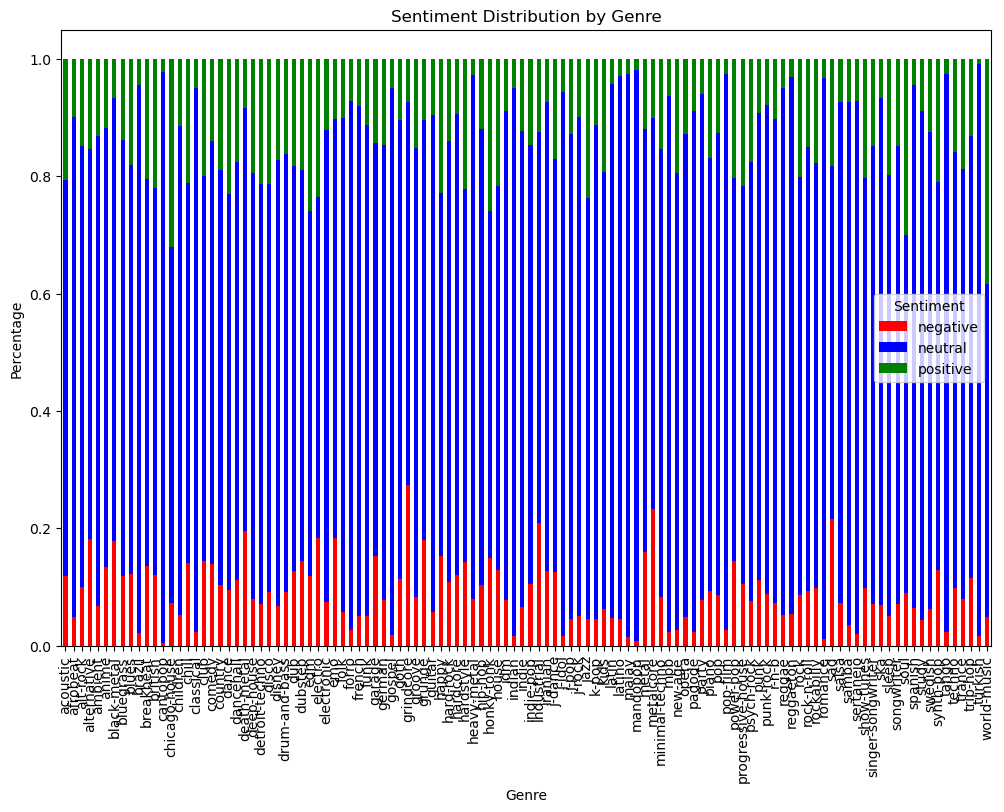

In [8]:
# Group by genre and sentiment
genre_sentiment = df.groupby(['track_genre', 'sentiment']).size().unstack().fillna(0)

# Normalize the values to get the percentage within each genre
genre_sentiment_norm = genre_sentiment.div(genre_sentiment.sum(axis=1), axis=0)

# Plot the sentiment distribution by genre
genre_sentiment_norm.plot(kind='bar', stacked=True, figsize=(12, 8), color=['red', 'blue', 'green'])
plt.title('Sentiment Distribution by Genre')
plt.xlabel('Genre')
plt.ylabel('Percentage')
plt.legend(title='Sentiment')
plt.show()


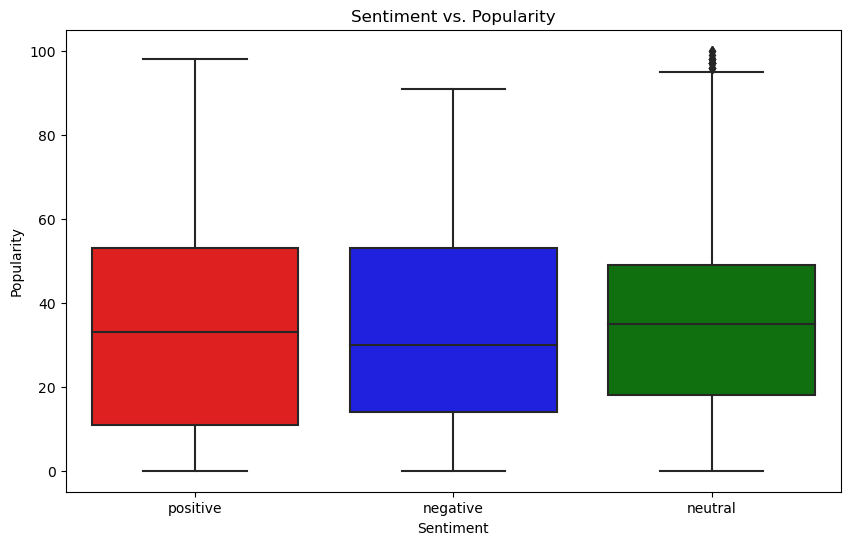

In [9]:
import seaborn as sns

# Plot sentiment vs. popularity
plt.figure(figsize=(10, 6))
sns.boxplot(x='sentiment', y='popularity', data=df, palette=['red', 'blue', 'green'])
plt.title('Sentiment vs. Popularity')
plt.xlabel('Sentiment')
plt.ylabel('Popularity')
plt.show()


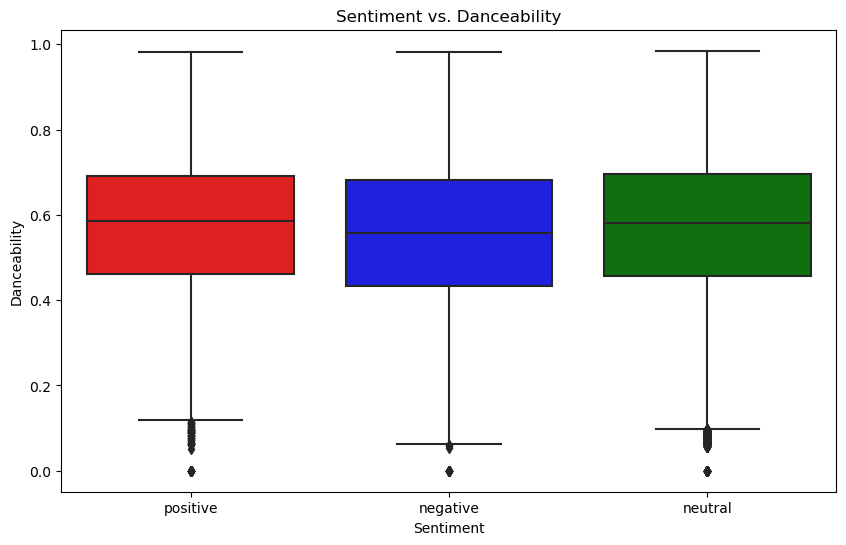

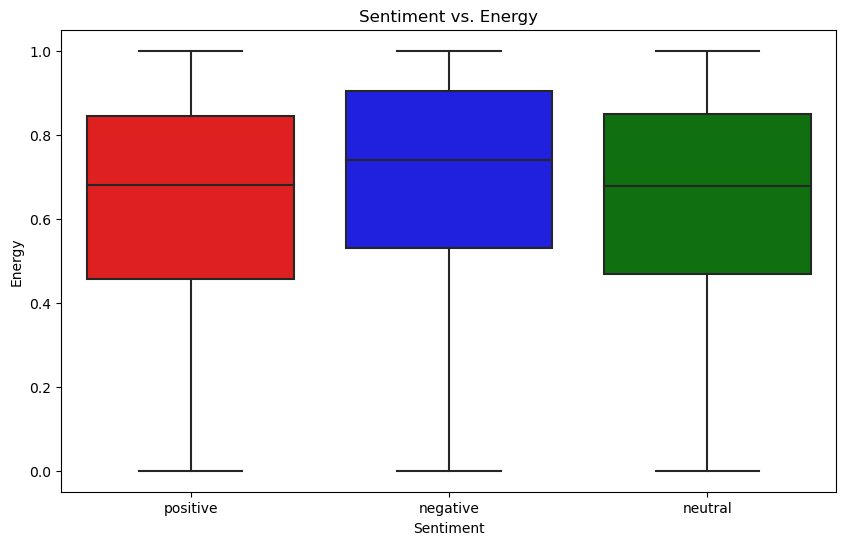

In [10]:
# Plot sentiment vs. danceability
plt.figure(figsize=(10, 6))
sns.boxplot(x='sentiment', y='danceability', data=df, palette=['red', 'blue', 'green'])
plt.title('Sentiment vs. Danceability')
plt.xlabel('Sentiment')
plt.ylabel('Danceability')
plt.show()

# Plot sentiment vs. energy
plt.figure(figsize=(10, 6))
sns.boxplot(x='sentiment', y='energy', data=df, palette=['red', 'blue', 'green'])
plt.title('Sentiment vs. Energy')
plt.xlabel('Sentiment')
plt.ylabel('Energy')
plt.show()
